In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dados=pd.read_csv("/Users/luizcarlosfigueiredo/OneDrive/Python_Cloud/julho04_1.csv",sep=',')



In [2]:
dados


,t,v
0,-0.022500,-0.250
1,-0.022499,0.000
2,-0.022498,-0.125
3,-0.022497,-0.125
4,-0.022496,-0.125
...,...,...
49995,0.022496,0.375
49996,0.022496,0.250
49997,0.022497,0.250
49998,0.022498,0.125


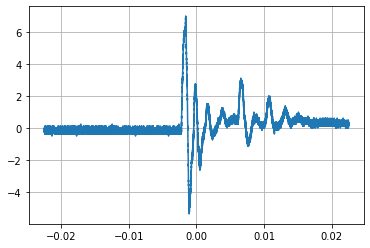

In [3]:
plt.plot(dados['t'],dados['v'])
plt.grid()
#plt.xlim(-0.005,0.00)

In [4]:
len(dados['t'])

50000

In [5]:
t=np.array(dados['t'])
acel=np.array(dados['v']*1225)
n=len(t)

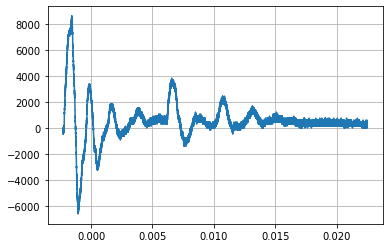

In [6]:
t=t[22450:n-1]
acel=acel[22450:n-1]
plt.plot(t,acel)
plt.grid()

In [7]:
n=len(t)
n

27549

In [8]:

t[0]
t=t-t[0]
t[0]

0.0

In [9]:
acel[0]

-153.125

In [10]:
acel[n-1]

153.125

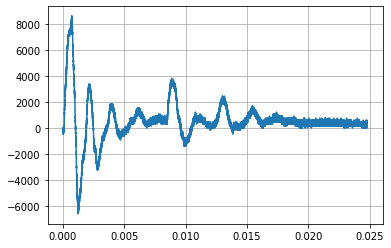

In [11]:
plt.plot(t,acel)
plt.grid()

In [12]:
a=t[0]
b=t[n-1]
d=(b-a)/(n)
d

8.99967330937602e-07

In [26]:
velox=np.cumsum(acel*d)
velox[n-1]

13.285883031282374

In [29]:
vm=sum(acel*d)
vm

13.285883031282374

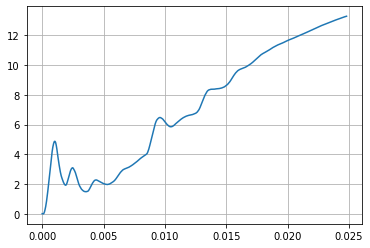

In [13]:
vel=np.cumsum(acel*d)
plt.plot(t,vel)
plt.grid()

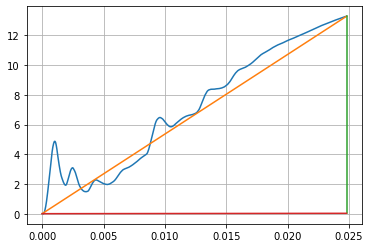

In [14]:
xl=np.array([t[0],t[n-1]])
yl=np.array([vel[0],vel[n-1]])
xv=np.array([t[n-1],t[n-1]])
yv=np.array([t[n-1],vel[n-1]])
xh=np.array([t[0],t[n-1]])
yh=np.array([vel[0],t[n-1]])
plt.plot(t,vel)
#plt.axhline(color='fuchsia')
plt.plot(xl,yl)
plt.plot(xv,yv)
plt.plot(xh,yh)
plt.grid()


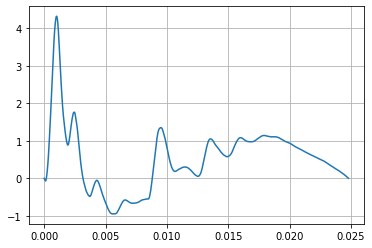

In [15]:
m = (vel[n-1]-vel[0])/(t[n-1]-t[0])
q=vel[0]
velcor= vel-(m*t+q)
plt.plot(t,velcor)
plt.grid()

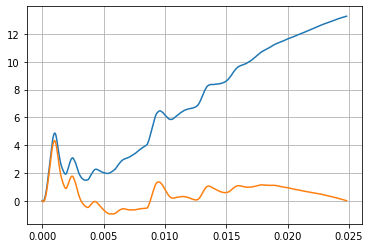

In [16]:
plt.plot(t,vel)
plt.plot(t,velcor)
plt.grid()


In [22]:
a=t[0]
b=t[n-1]
d=(b-a)/(n)
v=np.cumsum(velcor*d)
vm=v[n-1]
vm

0.013257988364837254

In [17]:
yd=np.zeros_like(t)
a=t[0]
N=len(t)
b=t[n-1]
dx=(b-a)/(N)

for i in range(N):
    if i==0:
        yd[i]=(velcor[i+1]-velcor[i])/dx
    elif i==N-1:
        yd[i]=(velcor[i]-velcor[i-1])/dx
    else:
        yd[i]=(velcor[i+1]-velcor[i-1])/(2*dx)


In [18]:
yd

array([-995.26803216, -918.70553216, -842.14303216, ..., -229.64303216,
       -306.20553216, -382.76803216])

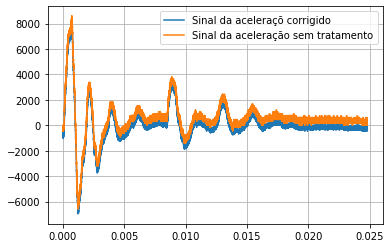

In [135]:
plt.plot(t,yd, label="Sinal da aceleraçõ corrigido")
plt.plot(t,acel, label="Sinal da aceleração sem tratamento")
plt.legend()
plt.grid()

In [25]:
velcor


array([ 0.00000000e+00, -8.95726222e-04, -1.65364495e-03, ...,
        6.88812369e-05, -1.37807498e-04, -4.82303730e-04])

In [19]:
I=dx*(((yd[0]+yd[N-1])/2)+np.sum(yd)-yd[0]-yd[N-1])
I

6.193604619773821e-16

In [20]:
len(t)

27549

In [33]:
velocidade=np.cumsum(yd*dx)
velocidade[N-1]

-0.0006200937193718836

In [24]:
N

27549